In [1]:
import yfinance as yf
import pandas as pd
import yahoo_fin.stock_info as si

import requests  
import json  

import numpy as np  
import matplotlib.pyplot as plt  
from scipy.signal import argrelextrema  
from datetime import datetime, timedelta  
from os import system 


In [4]:
stock_list = pd.read_csv('/Users/Nash/Desktop/Trading/nasdaq_screener_1608593683363.csv')  
count = 0  
screen_list = []  
  
#Get the API Key that is stored in file  
file_key = open('/Users/Nash/Desktop/Trading/financialmodelingprep_api_key.txt','r')  
key = file_key.read()  
file_key.close()  
  
#Used if Stock runs into an exception (such as no revenue detected)  
def removeSym(sym):  
    global screen_list_df  
      
    mapping = screen_list_df['symbol'] != sym  
    screen_list_df = screen_list_df[mapping]  

#Gets the initial stocklist in form of JSON converted to DataFrame based on sector, exchange, and no dividend
def screenSector(sector, exchange, key):  
      
    r = requests.get('https://financialmodelingprep.com/api/v3/stock-screener?'  
                     'marketCapMoreThan=250000000&volumeMoreThan=800000&'  
                     'sector={}&exchange={}&dividendLowerThan=0&apikey={}'.format(sector,exchange,key))  
    r = r.json()  
    initScreen = pd.DataFrame(r)  
    return initScreen  

#Removes any stocks that do not meet the Volume Weighted Average Price threshold
def screenVWAP(stock_df):  
    mapping1 = stock_df['price']*stock_df['volume'] > 12000000  
    new_screen_list_df = stock_df[mapping1]  
      
    return new_screen_list_df  

#Simple method to remove any shell companies from screen DataFrame
def removeShellComp(stock_df):  
    mapping1 = stock_df['industry'] != 'Shell Companies'  
    new_screen_list_df = stock_df[mapping1]  
      
    return new_screen_list_df  

"""Initial Screening to get stocks that meet requirements for what would 
have taken hours (now only takes seconds)""" 

screen_list_df = pd.DataFrame()  
  
for sector in getTop5().index.values.tolist():  
    for exchange in ['NYSE','NASDAQ']:  
        screen_list_df = screenSector(sector, exchange, key).append(screen_list_df, ignore_index = True)  
        
        
screen_list_df = screenVWAP(screen_list_df)  
screen_list_df = removeShellComp(screen_list_df)  
new_screen_list_df = screen_list_df['symbol']  
# screen_list_df.set_index('symbol',inplace=True)  
screen_list_df

,beta,companyName,country,exchange,exchangeShortName,industry,isActivelyTrading,isEtf,lastAnnualDividend,marketCap,price,sector,symbol,volume
0,1.002206,Copart Inc,US,Nasdaq Global Select,NASDAQ,Specialty Business Services,True,False,0,29697955800,125.6700,Industrials,CPRT,1170972
1,1.697186,United Airlines Holdings Inc,US,Nasdaq Global Select,NASDAQ,Airlines,True,False,0,17372901400,53.6900,Industrials,UAL,16534962
2,1.544953,Plug Power Inc,US,Nasdaq Capital Market,NASDAQ,Electrical Equipment & Parts,True,False,0,16670365700,28.2700,Industrials,PLUG,33283311
3,2.447324,Builders FirstSource Inc,US,Nasdaq Global Select,NASDAQ,Building Products & Equipment,True,False,0,10315407400,49.9700,Industrials,BLDR,1914055
4,0.000000,TuSimple Holdings Inc. Class A Common Stock,US,Nasdaq Global Select,NASDAQ,Trucking,True,False,0,8424022500,39.7000,Industrials,TSP,4921200
5,1.825688,Willscot Mobile Mini Holdings Corp,US,Nasdaq Capital Market,NASDAQ,Rental & Leasing Services,True,False,0,6708751400,29.6000,Industrials,WSC,1640998
6,1.825742,Ballard Power Systems Inc,CA,Nasdaq Global Market,NASDAQ,Specialty Industrial Machinery,True,False,0,6557937200,22.1300,Industrials,BLDP,5987659
7,1.709873,JetBlue Airways Corp,US,Nasdaq Global Select,NASDAQ,Airlines,True,False,0,6304242700,19.9100,Industrials,JBLU,9044972
8,2.331494,Avis Budget Group Inc,US,Nasdaq Global Select,NASDAQ,Rental & Leasing Services,True,False,0,6150368800,88.0400,Industrials,CAR,1525867
9,2.037463,Upwork Inc,US,Nasdaq Global Select,NASDAQ,Staffing & Employment Services,True,False,0,5881165800,46.6900,Industrials,UPWK,1938496


In [5]:
#Simple method that gets the
def getRevenueGrowth(stock,key):  
    global screen_list_df  
      
    sym = stock  
    r = requests.get('https://financialmodelingprep.com/api/v3/income-statement/{}?limit=10&apikey={}'.format(stock,key))  
    r = r.json()
    print(type(r))
    print(r)  
#     try:  
    stock = pd.DataFrame.from_dict(r)  
    stock =  stock[['date', 'revenue', 'costOfRevenue','grossProfit',  
                    'costAndExpenses','ebitda','operatingIncome','netIncome']]  
    stock = stock.transpose()  

    rev_grwth1 = float(stock[0]['revenue']/stock[1]['revenue'] - 1)  
    rev_grwth2 = float(stock[1]['revenue']/stock[2]['revenue'] - 1)  
    print("RG1:",rev_grwth1)
    print("RG2:",rev_grwth2)

    opCost_grwth1 = float(stock[0]['costAndExpenses']/stock[1]['costAndExpenses'] - 1)  
    opCost_grwth2 = float(stock[1]['costAndExpenses']/stock[2]['costAndExpenses'] - 1)  
    print("OCG1:",opCost_grwth1)
    print("OCG2:",opCost_grwth2)

    rev_grwth = {sym:{'Revenue Growth':[rev_grwth1,rev_grwth2],'Cost Growth':[opCost_grwth1,opCost_grwth2]}}
    print(rev_grwth)
#     except:
#     print(sym)  
#     removeSym(sym)  
#         return  
      
      
    return rev_grwth  
## CALL REQUEST LIMIT IF UNCOMMENTED  
# s = {}  
# s = s.update(new_screen_list_df.apply(lambda x: getRevenueGrowth(x,key)))  
getRevenueGrowth('GHIV',key)

<class 'list'>
[{'date': '2020-07-31', 'symbol': 'CPRT', 'reportedCurrency': 'USD', 'fillingDate': '2020-09-28', 'acceptedDate': '2020-09-28 16:48:27', 'period': 'FY', 'revenue': 2205583000, 'costOfRevenue': 1197781000, 'grossProfit': 1007802000, 'grossProfitRatio': 0.4569322487523707, 'researchAndDevelopmentExpenses': 0.0, 'generalAndAdministrativeExpenses': 191703000, 'sellingAndMarketingExpenses': 0.0, 'otherExpenses': 3611000.0, 'operatingExpenses': 191703000, 'costAndExpenses': 1389484000, 'interestExpense': 20230000, 'depreciationAndAmortization': 24391000, 'ebitda': 840490000, 'ebitdaratio': 0.3810738475949443, 'operatingIncome': 816099000, 'operatingIncomeRatio': 0.37001509351495726, 'totalOtherIncomeExpensesNet': 3611000.0, 'incomeBeforeTax': 800839000, 'incomeBeforeTaxRatio': 0.363096287920246, 'incomeTaxExpense': 100932000, 'netIncome': 699907000, 'netIncomeRatio': 0.3173342377049515, 'eps': 3.0, 'epsdiluted': 2.93, 'weightedAverageShsOut': 233202000, 'weightedAverageShsOutD

NameError: name 'rev_gwth' is not defined

In [17]:
print(s)

None


In [26]:
TODAY = datetime.now()
START = TODAY - timedelta(days=120)
print(TODAY)
print(START)
def listToString(list):  
    return " ".join(list)  

##NEEDS TO REMOVE DELISTED STOCKS
def removeDelisted(stock):
    pass
#See the Cell Block Below to Understand Logic; Gets Top Value Open/Close depending if day makes Gains/Loss  
def getGreaterArray(Open, Close):  
      
#     print(\"Open greater: \  np.greater(Open,Close))        # For Debbugging purposes  
#     print(\"Close greater: \  np.greater_equal(Close,Open)) # For Debbugging purposes  
    mask1 = np.greater(Open,Close)  
    mask2 = np.greater_equal(Close,Open)  
  
    Open_Greater = Open*mask1  
    Close_Greater = Close*mask2  
  
#     print('\n')  
#     print(Open_Greater)  
#     print(Close_Greater)  
  
    arr3 = Open_Greater+Close_Greater  
#     print(arr3)  
      
    return arr3  
  
#See the Cell Block Below to Understand Logic; Gets Lesser Value Open/Close depending if day makes Gains/Loss  
def getLesserArray(Open, Close):  
      
#     print(\"Open Lesser: \  np.less(Open,Close))        # For Debbugging purposes  
#     print(\"Close Lesser: \  np.less_equal(Close, Open)) # For Debbugging purposes  
    mask1 = np.less(Open,Close)  
    mask2 = np.less_equal(Close,Open)  
  
    Open_Less = Open*mask1  
    Close_Less = Close*mask2  
  
#     print('\n')  
#     print(Open_Less)   # For Debbugging purposes  
#     print(Close_Less)  # For Debbugging purposes  
 
    arr3 = Open_Less+Close_Less  
#     print(arr3)  # For Debbugging purposes  
      
    return arr3  
  
#Counts the streak of a stock's historical price to be able to determine gain/loss streak distribution  
#RETURNS a list of the gain/loss distribution  
def countStreak(series):  
      
    count = 0  
    to_store = 0  
    index = 0  
    streak = []  
    print(len(series))  
      
    for i in range(len(series)):  
          
        if (count == 0) & (series[i] == True):  
            count += 1  
        elif (series[i-1] == True) & (series[i] == True):  
            count += 1  
        else:  
            to_store = count  
            count = 0  
              
        if count == 0:  
            streak.append(to_store)  
            if to_store != 0:  
                streak.append(count)  
            index += 1  
          
        if (i == len(series) - 1) & (series[i] == True):  
            streak.append(count)  
          
    return streak  
  
# Gets summary statistics of an array or list passed in in terms of wins and losses; returns dictionary  
def countGainLoss(series):  
    count = 0  
    for i in series:  
        if i > 0:  
            count+=1  
      
    stats = {'Gains': count, 'Losses': len(series) - count, 'Total': len(series), 'WinLoss': count/(len(series) - count)}  
     
    return stats  
  
# Takes dataframe of stock prices (DF is 'stock') and uses minimum or maximum (max is the default)  
def identifyLevel(stock, col = 'Pivot', name = "Default Stock"):  
    print("IDENTIFY LEVEL\n")    
    level_df = pd.DataFrame()  
    ind = 1       #Number that identifies different column name; changes on each iteration of loop  
    count = 0     #Stops the while loop when all the prices have been checked for
    mask = ~stock['Pivot'].isna()
    stock = stock[mask]
    remaining_df = stock
    
    print("FROM IDENTIFY, ", stock)  
    
    #Each iteration determined by the creation of a new column 
    #(index is date, so each level's dates are unique from last 
    # -> increases count on each iteration)
    #vvvvvvvvvvvvvvvvvvvvvvvvvvv
    while count < stock.shape[0]: #Replace series_max with the dataframe the function takes in; shape gives length  
      
#       print('iteration: ', ind)  
          
        price = remaining_df[col].iloc[0] #Grabs first price in 'Remaining_df' to use for Range Mask
        ##FIXED BUG: Originally 'stock[col]'; This would put number in two levels and create duplicate indexes in finalizeStock
        mask_x = (price*0.9875 <= remaining_df[col]) & (remaining_df[col] <= price*1.0125) #Creates a mask of prices in the DF within range  
#         print(mask_x)  
        temp_df = pd.DataFrame({'Level {}'.format(ind) : remaining_df[col][mask_x].values.tolist()}  #Takes the Level Line for values that match current 'price' being searched for  
                               ,index = remaining_df[col][mask_x].index)  
        level_df = pd.concat([level_df,temp_df],axis=1) #Applies Mask to a level series creating a new column (New DF)  
  
        remaining_df = remaining_df[~mask_x]  #Removes the values that were just applied at this level from remaining_df
  
        ind += 1      #Iterates to change column name for next go around  
        count = level_df.shape[0]  
#     print(level_df)
          
            #print('An error occurred in \"identifyLevel\" function.  Check to make sure {} has \"min\" or \"max\" column.'.format(name))  
            #return  
#     print("Level Shape", df.shape)      
    return level_df  
  
#Takes in the stock_df ('df') with the minima and maxima points and the 'level_df'  
#Replaces the minima/maxima points with the average value if the level contains 2 or more points  
#Creates a Column of the level's strength:  
    #(Pivot - 1 point and less than 30 days, Weak - 2 or more Points & More than 30 Days,   
    # Relevant - 2 Points & Less than 30 Days, Strong - 3 Points and At least one Less than 30 Days,   
    # Very Strong - 4 or More Points and At least one less than 30 Days)  
def finalizeStock(stock, pivot_df, level_df):  
#     Going to need to check how many non-NaN values in each column for Level_DF  
#     If non-NaN value > 1, Average the values replace the values in df that give that average  
#     Use the TimeDelta data in Level_df Index as well as number of points to create the relevant label  
#         Create a Column called 'Average' in Level_Df and put average values there  
#         Repeat step above but call column 'Strength' and place the labels there  
#         Use 'Average' values and Replace  Maxima/Minima values in df that correspond to index  
#         Repeat step above merging the 'Strength' column above with corresponding index  
    print("FINALIZE STOCK\n")
    
    today = datetime.now()      
    num_of_pivots = level_df.shape[0] - level_df.isna().sum()  # Stores the number of pivots for each level line  
    print(num_of_pivots)  
  
    temp = pd.DataFrame()  
    
    #4/19/21: NEED TO IMPLEMENT TO REMOVE DELISTED STOCKS
    try:
        for i,piv in num_of_pivots.iteritems():   # Lazily loops through num_of_pivots (i is the name of the Level i.e. 'Level 1', piv is the numb of pivs)  

            pivot_dates = pd.DataFrame(level_df[~level_df.isna()[i]].index)  # Creates a DF of the Pivot Points Dates (Col: 'Date')  
            pivot_days = ((today - pivot_dates['Date'])/np.timedelta64(1, 'D')).astype(int)  # Calculates days between pivot date and today  
            pivot_dates['Days'] = pivot_days  
            pivot_dates.set_index('Date',inplace = True)   
            check_date = (pivot_dates <= 30).any().values[0]  # If any values <= 30, then TRUE  

            avg = level_df[i].mean(axis = 0, skipna = True)  # If there is more than 1 pivot, get the average  

            if piv > 1:  

                if (piv == 2) & check_date:  
                    listLabel = ['Relevant']*piv  

                elif (piv >= 2) & ~check_date:  
                    listLabel = ['Weak']*piv  

                elif (piv == 3) & check_date:  
                    listLabel = ['Strong']*piv  

                elif (piv >= 4) & check_date:  
                    listLabel = ['Very Strong']*piv  

            elif (piv == 1) & check_date:  
                listLabel = ['Pivot']*piv  

            else:  
                listLabel = ['Old Pivot']*piv  

            pivot_dates['Level Type'] = listLabel  
            pivot_dates['Level'] = avg  

            temp = pd.concat([temp, pivot_dates])
    #     print("DF", df)
    #     print("TEMP", temp)
        merged = pd.merge(df, temp, on='Date',how = 'outer') #CHANGED: Was 'outer' #UPDATE: now 'outer' again?
    #     print("MERGED 1: ", merged)
        final_df = pd.merge(stock, merged[['Days', 'Level Type', 'Level']], on='Date', how='outer') #CHANGED: Was 'outer' #UPDATE: now 'outer' again?
    except:
        removeDelisted(stock)
        return
        
#     print("DF", df)
#     print("FINALIZED: ", final_df)  
#     print("Finalized Shape", final_df.shape)
    
    #check_watchlist(final_df)
    
    return final_df  

#Gets the minima and maxima values, as well as combining them into a 'Pivot' column
def grabPivots(df,period = 5):  
    print("GRAB PIVOTS\n")  
    #Tried simply merging a DataFrame of Min and Max together as an inner, but that did not work  
    df['min'] = df.iloc[argrelextrema(getLesserArray(df.Open.values,df.Close.values), np.less_equal,  
                    order=period)[0]]['Close'] #Gets local minima points for given period on 'Close' prices  
    df1 = pd.DataFrame(df['min']) 
    df1.rename(columns={'min':'Pivot'},inplace = True)  
    mask = ~df['min'].isna()
      
    df1 = df1[mask]  
    print("DF1 MIN:",  df1)  
      
    df['max'] = df.iloc[argrelextrema(getGreaterArray(df.Open.values,df.Close.values), np.greater_equal,  
                    order=period)[0]]['Close'] #Gets local maxima points for given period on 'Close' prices  
    df2 = pd.DataFrame(df['max'])
    df2.rename(columns={'max':'Pivot'},inplace = True)
    ##FIXED BUG: AMCI had error on 10/28 with local minima being the local maxima as well duplicating rows
    mask2 = (~df['max'].isna()) & (df['min'] != df['max']) 
      
    df2 = df2[mask2]  
    print("DF2 Max: ",  df2)  
  
    df3 = pd.concat([df1, df2])  
    print("DF3 Concat: ",  df3)  
    df = df.merge(df3, on='Date', how = 'outer',sort = True) #Basically takes the min and max values, puts into one column called 'Pivot'  
                                                 #This will be used for checking levels in identifyLevels()  
    print("GP Shape", df.shape)
    return df  
  
#Example of Grabbing large amount of stocks as thread and reading price  
df1 = pd.read_excel("/Users/Nash/Desktop/Trading/Master_Stock_Screen.xlsx",  sheet_name='2020-12-24')  
df1= df1['Symbol'][:100]  
list_screen = df1.values.tolist()  
print(list_screen)  
data = yf.download(listToString(list_screen), start=START,   
                    end=TODAY,  group_by='tickers')
print("DONE")
  
  
  
# This Works for a single Stock.  Now I need to see if I can get it to work for an entire DataFrame!!!

############
# df = stock_test['A']  
# # df = pd.DataFrame(df)  

  
# df_pivots = grabPivots(df,period = 5)  #Get the minimum and maximum values of stockprice
#                                  # Add the ability to change time period and time frame of stock

# # df_pivots = df_pivots[df_pivots['Pivot'] > 0] 
# level_df = identifyLevel(df_pivots, name = 'A')  

# df = finalizeStock(df,df_pivots, level_df)  
############

# plt.scatter(df.index, df['min'], c='r')  
# plt.scatter(df.index, df['max'], c='g')  
# plt.plot(df.index, df['Close'])  
# plt.show() 

# map(lambda i: grabPivots(i),np.unique(stock_test.columns.get_level_values(0).tolist()))  
#stock_test.apply(lambda x: x[map(lambda i: grabPivots(i),np.unique(stock_test.columns.get_level_values(0).tolist()))])  

2021-05-11 13:10:15.718610
2021-01-11 13:10:15.718610
['A', 'AAL', 'AAON', 'AAWW', 'AAXN', 'AB', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCL', 'ABM', 'ABMD', 'ABR', 'ABT', 'ABUS', 'ACA', 'ACAD', 'ACB', 'ACC', 'ACCD', 'ACGL', 'ACHC', 'ACM', 'ADC', 'ADP', 'ADPT', 'ADS', 'ADT', 'ADUS', 'ADVM', 'AEIS', 'AEL', 'AER', 'AFG', 'AFL', 'AGCO', 'AGIO', 'AGNC', 'AGO', 'AHCO', 'AHT', 'AIG', 'AIMC', 'AIR', 'AIRC', 'AIT', 'AIV', 'AIZ', 'AJG', 'AJRD', 'AKBA', 'AKR', 'AL', 'ALC', 'ALEC', 'ALGN', 'ALGT', 'ALK', 'ALKS', 'ALL', 'ALLE', 'ALLK', 'ALLO', 'ALLY', 'ALNY', 'ALT', 'ALTM', 'ALVR', 'ALXN', 'ALXO', 'AM', 'AMCI', 'AME', 'AMED', 'AMG', 'AMGN', 'AMH', 'AMN', 'AMP', 'AMRC', 'AMRN', 'AMSC', 'AMT', 'AMWL', 'ANTM', 'AON', 'AOS', 'APA', 'APAM', 'APG', 'APHA', 'APLE', 'APLS', 'APO', 'APT', 'APVO', 'APXT', 'AQUA', 'AR']
[*********************100%***********************]  100 of 100 completed

2 Failed downloads:
- AAXN: No data found, symbol may be delisted
- AMCI: No data found, symbol may be delisted
DONE


In [30]:
from timeit import default_timer as timer
start = timer()

streak = []  
count = 0  
  
cumlative = pd.DataFrame()

for i in np.unique(stock_test.columns.get_level_values(0).tolist()):  
      
    count += 1  
    print("STOCK {}".format(i))
    df = stock_test[i]
    
    ##CHECKS TO SEE IF STOCK EXISTS
    if df.isnull().values.all():
        print("Stock {} does not exist.".format(i))
    else:
        
    #     print("1.", df.shape)
        df_pivots = grabPivots(df, period = 5) #ABB ISSUE, Adds 2 Rows to df
        level_df = identifyLevel(df_pivots, name = i)  

        df = finalizeStock(df,df_pivots, level_df) #ABB ISSUE, Adds 2 Rows to df
    #     print("2.", df.shape)
        df.columns = pd.MultiIndex.from_product([[i],df.columns])
    #     print("3.", df.shape)
     #Creates a new column called 'ticker' that takes an array the size of all the rows for the stock.  
        #df.set_index([df.index, md],inplace = True)  
        if count == 1:  
            cumlative = df  
        else:
    #         print(i,"'s SHAPE'")
    #         print("4. DF SHAPE: ", df.shape)
    #         print("CUM SHAPE: ", cumlative.shape)

            cumlative = pd.concat([cumlative,df],axis=1)  
print("df of {}: ".format(i), cumlative)  
      
#     plt.scatter(df.index, df['min'], c='r')  
#     plt.scatter(df.index, df['max'], c='g')  
#     plt.plot(df.index, df['Open'])  
# plt.show()  
#     GET HISTORICAL GAIN STREAK  
#     win_streak = countStreak(np.greater_equal(stock_test[i].Open.values,stock_test[i].Close.values))  
#     loss_streak = countStreak(np.less_equal(stock_test[i].Open.values,stock_test[i].Close.values))  
#     print(\"------- {} -------\".format(i))  
#     print(\"MAX GAIN STREAK: \  max(win_streak))  
#     print(\"MAX LOSS STREAK: \  max(loss_streak))  
#     plt.hist(win_streak, density = True, bins=max(win_streak),align = 'mid')  
#     plt.ylabel('Probability')  
#     plt.xlabel('Daily Gain Streak')  
  
#     stock_test.apply(lambda x: grabPivots(x[i]))

end = timer()
print(end - start, " seconds") # Time in seconds, e.g. 5.38091952400282

STOCK A
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-27  118.800003
2021-03-04  114.989998
2021-03-24  120.839996
2021-05-11  131.210007
DF2 Max:                   Pivot
Date                  
2021-01-12  126.970001
2021-02-17  130.119995
2021-03-16  123.000000
2021-04-26  137.339996
DF3 Concat:                   Pivot
Date                  
2021-01-27  118.800003
2021-03-04  114.989998
2021-03-24  120.839996
2021-05-11  131.210007
2021-01-12  126.970001
2021-02-17  130.119995
2021-03-16  123.000000
2021-04-26  137.339996
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-12  128.330002  128.389999  126.199997  126.970001  126.777092   
2021-01-27  122.080002  123.000000  118.110001  118.800003  118.619507   
2021-02-17  132.800003  136.979996  129.589996  130.119995  129.922302   
2021-03-04  118.690002

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


FINALIZE STOCK

Level 1    1
Level 2    1
Level 3    2
Level 4    1
Level 5    1
Level 6    1
Level 7    1
dtype: int64
STOCK AAL
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-11  15.000000
2021-01-27  16.559999
2021-02-11  16.990000
2021-03-05  20.450001
2021-03-25  22.770000
2021-04-21  21.010000
2021-05-11  21.305000
DF2 Max:                  Pivot
Date                 
2021-01-14  16.440001
2021-01-28  18.100000
2021-03-04  21.240000
2021-03-15  25.170000
2021-04-05  24.230000
2021-04-26  22.040001
2021-05-10  22.000000
DF3 Concat:                  Pivot
Date                 
2021-01-11  15.000000
2021-01-27  16.559999
2021-02-11  16.990000
2021-03-05  20.450001
2021-03-25  22.770000
2021-04-21  21.010000
2021-05-11  21.305000
2021-01-14  16.440001
2021-01-28  18.100000
2021-03-04  21.240000
2021-03-15  25.170000
2021-04-05  24.230000
2021-04-26  22.040001
2021-05-10  22.000000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       

FINALIZE STOCK

Level 1    2
Level 2    1
Level 3    2
Level 4    2
Level 5    2
Level 6    1
Level 7    1
Level 8    1
Level 9    1
dtype: int64
STOCK ABB
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-15  29.350000
2021-02-05  28.820000
2021-02-26  28.780001
2021-03-30  30.219999
2021-04-30  32.430000
DF2 Max:                  Pivot
Date                 
2021-01-14  30.740000
2021-01-26  30.520000
2021-02-03  30.559999
2021-02-19  30.139999
2021-03-26  31.590000
2021-04-19  33.240002
2021-05-07  34.110001
DF3 Concat:                  Pivot
Date                 
2021-01-15  29.350000
2021-02-05  28.820000
2021-02-26  28.780001
2021-03-30  30.219999
2021-04-30  32.430000
2021-01-14  30.740000
2021-01-26  30.520000
2021-02-03  30.559999
2021-02-19  30.139999
2021-03-26  31.590000
2021-04-19  33.240002
2021-05-07  34.110001
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close   Volume  \
Date        

DF1 MIN:                 Pivot
Date                 
2021-01-11  43.590000
2021-01-29  39.110001
2021-03-25  52.680000
2021-04-21  49.380001
DF2 Max:                  Pivot
Date                 
2021-01-14  44.880001
2021-02-25  48.119999
2021-03-18  55.119999
2021-05-10  55.770000
DF3 Concat:                  Pivot
Date                 
2021-01-11  43.590000
2021-01-29  39.110001
2021-03-25  52.680000
2021-04-21  49.380001
2021-01-14  44.880001
2021-02-25  48.119999
2021-03-18  55.119999
2021-05-10  55.770000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2021-01-11  42.040001  43.740002  41.849998  43.590000  43.465931  460400   
2021-01-14  44.450001  45.180000  44.139999  44.880001  44.752258  485600   
2021-01-29  40.669998  40.669998  36.599998  39.110001  38.998680  796300   
2021-02-25  50.790001  50.910000  47.810001  48.11

STOCK ABR
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-11  14.230000
2021-01-27  14.130000
2021-03-05  15.680000
2021-03-26  15.400000
2021-04-20  16.139999
2021-04-21  16.459999
2021-05-06  17.250000
DF2 Max:                  Pivot
Date                 
2021-01-21  14.650000
2021-02-05  15.450000
2021-03-01  16.870001
2021-03-15  16.910000
2021-04-29  17.889999
2021-05-10  17.780001
DF3 Concat:                  Pivot
Date                 
2021-01-11  14.230000
2021-01-27  14.130000
2021-03-05  15.680000
2021-03-26  15.400000
2021-04-20  16.139999
2021-04-21  16.459999
2021-05-06  17.250000
2021-01-21  14.650000
2021-02-05  15.450000
2021-03-01  16.870001
2021-03-15  16.910000
2021-04-29  17.889999
2021-05-10  17.780001
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2021-01-11  14.080000  14.500000  14

FINALIZE STOCK

Level 1     1
Level 2     1
Level 3     1
Level 4     1
Level 5     1
Level 6     1
Level 7     1
Level 8     3
Level 9     1
Level 10    1
Level 11    1
dtype: int64
STOCK ACB
GRAB PIVOTS

DF1 MIN:             Pivot
Date             
2021-01-11  10.44
2021-01-25  10.16
2021-03-05   9.60
2021-03-25   9.27
2021-04-20   7.65
2021-05-11   8.23
DF2 Max:              Pivot
Date             
2021-01-15  12.04
2021-02-10  18.92
2021-03-16  10.44
2021-04-01   9.14
2021-04-29   8.96
DF3 Concat:              Pivot
Date             
2021-01-11  10.44
2021-01-25  10.16
2021-03-05   9.60
2021-03-25   9.27
2021-04-20   7.65
2021-05-11   8.23
2021-01-15  12.04
2021-02-10  18.92
2021-03-16  10.44
2021-04-01   9.14
2021-04-29   8.96
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open    High        Low  Close  Adj Close    Volume    min  \
Date                                                                          
2021-01-11   9.830000  10.730   9.730000  10.44    

STOCK ACHC
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-15  50.740002
2021-01-27  49.540001
2021-02-18  50.650002
2021-03-25  57.400002
2021-04-30  60.919998
DF2 Max:                  Pivot
Date                 
2021-01-21  51.590000
2021-02-05  54.400002
2021-03-15  60.970001
2021-04-22  61.520000
2021-05-10  63.419998
DF3 Concat:                  Pivot
Date                 
2021-01-15  50.740002
2021-01-27  49.540001
2021-02-18  50.650002
2021-03-25  57.400002
2021-04-30  60.919998
2021-01-21  51.590000
2021-02-05  54.400002
2021-03-15  60.970001
2021-04-22  61.520000
2021-05-10  63.419998
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2021-01-15  50.619999  51.720001  50.310001  50.740002  50.740002  464700   
2021-01-21  52.480000  52.480000  51.520000  51.590000  51.590000  364800   
2021-01-27  50.

DF1 MIN:                  Pivot
Date                  
2021-01-21  161.029999
2021-02-17  167.130005
2021-03-04  171.009995
2021-04-07  185.809998
2021-04-30  186.990005
DF2 Max:                   Pivot
Date                  
2021-01-11  168.509995
2021-02-05  167.279999
2021-03-15  189.080002
2021-04-05  193.070007
2021-04-27  195.889999
2021-05-07  194.889999
DF3 Concat:                   Pivot
Date                  
2021-01-21  161.029999
2021-02-17  167.130005
2021-03-04  171.009995
2021-04-07  185.809998
2021-04-30  186.990005
2021-01-11  168.509995
2021-02-05  167.279999
2021-03-15  189.080002
2021-04-05  193.070007
2021-04-27  195.889999
2021-05-07  194.889999
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-11  170.929993  171.580002  168.119995  168.509995  167.649261   
2021-01-21  162.199997  162.350006  160.100006  161.0

FINALIZE STOCK

Level 1    2
Level 2    2
Level 3    2
Level 4    2
Level 5    1
Level 6    1
Level 7    3
Level 8    1
dtype: int64
STOCK ADUS
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-12  121.459999
2021-01-29  112.550003
2021-02-01  114.570000
2021-03-04   93.010002
2021-03-25  104.440002
2021-04-07  102.980003
2021-05-05   92.870003
DF2 Max:                   Pivot
Date                  
2021-01-26  124.129997
2021-02-09  126.029999
2021-02-24  121.309998
2021-03-22  109.519997
2021-04-29  108.589996
DF3 Concat:                   Pivot
Date                  
2021-01-12  121.459999
2021-01-29  112.550003
2021-02-01  114.570000
2021-03-04   93.010002
2021-03-25  104.440002
2021-04-07  102.980003
2021-05-05   92.870003
2021-01-26  124.129997
2021-02-09  126.029999
2021-02-24  121.309998
2021-03-22  109.519997
2021-04-29  108.589996
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  

DF1 MIN:                 Pivot
Date                 
2021-01-11  29.879999
2021-01-27  29.270000
2021-02-26  27.629999
2021-03-25  29.549999
2021-04-13  31.309999
2021-04-22  30.840000
2021-05-11  30.330000
DF2 Max:                  Pivot
Date                 
2021-01-19  30.629999
2021-02-05  29.790001
2021-03-12  32.459999
2021-04-05  32.529999
2021-04-16  31.930000
2021-05-06  31.500000
DF3 Concat:                  Pivot
Date                 
2021-01-11  29.879999
2021-01-27  29.270000
2021-02-26  27.629999
2021-03-25  29.549999
2021-04-13  31.309999
2021-04-22  30.840000
2021-05-11  30.330000
2021-01-19  30.629999
2021-02-05  29.790001
2021-03-12  32.459999
2021-04-05  32.529999
2021-04-16  31.930000
2021-05-06  31.500000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2021-01-11  29.120001  30.200001  29.100000  29.879999  29.

STOCK AGCO
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-11  114.430000
2021-01-27  102.800003
2021-02-18  115.070000
2021-03-04  125.760002
2021-03-23  135.190002
2021-04-08  145.399994
2021-04-20  145.130005
2021-04-30  145.919998
2021-05-11  145.589996
DF2 Max:                   Pivot
Date                  
2021-01-21  115.070000
2021-02-04  121.099998
2021-03-18  147.429993
2021-04-28  156.160004
2021-05-06  156.520004
DF3 Concat:                   Pivot
Date                  
2021-01-11  114.430000
2021-01-27  102.800003
2021-02-18  115.070000
2021-03-04  125.760002
2021-03-23  135.190002
2021-04-08  145.399994
2021-04-20  145.130005
2021-04-30  145.919998
2021-05-11  145.589996
2021-01-21  115.070000
2021-02-04  121.099998
2021-03-18  147.429993
2021-04-28  156.160004
2021-05-06  156.520004
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                   

DF1 MIN:                 Pivot
Date                 
2021-01-13  36.709999
2021-01-27  37.049999
2021-02-23  30.440001
2021-03-03  30.490000
2021-03-25  34.290001
2021-04-20  28.270000
2021-05-11  24.600000
DF2 Max:                  Pivot
Date                 
2021-01-21  38.099998
2021-02-02  38.759998
2021-03-16  38.070000
2021-04-05  38.500000
2021-04-28  30.320000
DF3 Concat:                  Pivot
Date                 
2021-01-13  36.709999
2021-01-27  37.049999
2021-02-23  30.440001
2021-03-03  30.490000
2021-03-25  34.290001
2021-04-20  28.270000
2021-05-11  24.600000
2021-01-21  38.099998
2021-02-02  38.759998
2021-03-16  38.070000
2021-04-05  38.500000
2021-04-28  30.320000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2021-01-13  36.900002  37.509998  36.220001  36.709999  36.709999  2044400   
2021-01-21  38.259998  38

STOCK AIR
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-11  37.799999
2021-01-29  33.549999
2021-03-23  39.980000
2021-04-21  39.869999
2021-05-11  39.139999
DF2 Max:                  Pivot
Date                 
2021-01-14  39.709999
2021-02-25  39.950001
2021-03-12  43.970001
2021-03-26  42.880001
2021-04-15  40.759998
2021-04-26  40.270000
DF3 Concat:                  Pivot
Date                 
2021-01-11  37.799999
2021-01-29  33.549999
2021-03-23  39.980000
2021-04-21  39.869999
2021-05-11  39.139999
2021-01-14  39.709999
2021-02-25  39.950001
2021-03-12  43.970001
2021-03-26  42.880001
2021-04-15  40.759998
2021-04-26  40.270000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2021-01-11  37.130001  38.220001  37.130001  37.799999  37.799999  203800   
2021-01-14  39.169998  40.740002  39.080002  39.7

STOCK AIZ
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-11  137.809998
2021-01-27  130.789993
2021-02-19  123.309998
2021-04-01  142.300003
DF2 Max:                   Pivot
Date                  
2021-01-19  142.979996
2021-02-09  136.130005
2021-03-10  138.740005
2021-05-10  159.960007
DF3 Concat:                   Pivot
Date                  
2021-01-11  137.809998
2021-01-27  130.789993
2021-02-19  123.309998
2021-04-01  142.300003
2021-01-19  142.979996
2021-02-09  136.130005
2021-03-10  138.740005
2021-05-10  159.960007
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-11  137.330002  138.899994  137.279999  137.809998  137.069138   
2021-01-19  141.389999  143.369995  140.179993  142.979996  142.211349   
2021-01-27  129.649994  131.399994  128.000000  130.789993  130.086884   
2021-02-09  134.8099

STOCK AKR
GRAB PIVOTS

DF1 MIN:             Pivot
Date             
2021-01-12  14.67
2021-02-03  14.72
2021-03-02  18.59
2021-03-25  19.32
2021-04-14  19.59
2021-05-11  21.02
DF2 Max:                  Pivot
Date                 
2021-01-14  15.750000
2021-01-26  15.460000
2021-02-25  18.920000
2021-03-15  21.389999
2021-04-07  19.820000
2021-05-10  21.750000
DF3 Concat:                  Pivot
Date                 
2021-01-12  14.670000
2021-02-03  14.720000
2021-03-02  18.590000
2021-03-25  19.320000
2021-04-14  19.590000
2021-05-11  21.020000
2021-01-14  15.750000
2021-01-26  15.460000
2021-02-25  18.920000
2021-03-15  21.389999
2021-04-07  19.820000
2021-05-10  21.750000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2021-01-12  14.330000  14.680000  14.260000  14.670000  14.554001   522400   
2021-01-14  15.160000  16.100000  

STOCK ALGN
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-28  536.580017
2021-03-08  496.070007
2021-03-25  517.869995
2021-05-11  566.852417
DF2 Max:                   Pivot
Date                  
2021-01-19  557.409973
2021-02-08  602.440002
2021-03-16  542.539978
2021-04-29  604.340027
DF3 Concat:                   Pivot
Date                  
2021-01-28  536.580017
2021-03-08  496.070007
2021-03-25  517.869995
2021-05-11  566.852417
2021-01-19  557.409973
2021-02-08  602.440002
2021-03-16  542.539978
2021-04-29  604.340027
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-19  574.719971  574.719971  545.080017  557.409973  557.409973   
2021-01-28  509.359985  547.570007  509.359985  536.580017  536.580017   
2021-02-08  622.190002  630.039978  595.780029  602.440002  602.440002   
2021-03-08  532.280

STOCK ALL
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-15  108.400002
2021-02-17  104.860001
2021-03-23  111.860001
DF2 Max:                   Pivot
Date                  
2021-01-21  110.720001
2021-03-15  117.269997
2021-05-11  133.130005
DF3 Concat:                   Pivot
Date                  
2021-01-15  108.400002
2021-02-17  104.860001
2021-03-23  111.860001
2021-01-21  110.720001
2021-03-15  117.269997
2021-05-11  133.130005
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-15  108.699997  109.370003  108.019997  108.400002  107.605324   
2021-01-21  111.519997  111.900002  110.709999  110.720001  109.908318   
2021-02-17  102.930000  105.089996  102.550003  104.860001  104.091278   
2021-03-15  115.680000  117.300003  115.599998  117.269997  117.269997   
2021-03-23  111.769997  112.839996  11

STOCK ALLY
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-11  37.480000
2021-01-27  36.450001
2021-02-26  41.500000
2021-03-25  45.470001
2021-04-21  48.430000
DF2 Max:                  Pivot
Date                 
2021-01-13  39.560001
2021-02-05  41.639999
2021-03-18  45.320000
2021-05-10  53.669998
DF3 Concat:                  Pivot
Date                 
2021-01-11  37.480000
2021-01-27  36.450001
2021-02-26  41.500000
2021-03-25  45.470001
2021-04-21  48.430000
2021-01-13  39.560001
2021-02-05  41.639999
2021-03-18  45.320000
2021-05-10  53.669998
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2021-01-11  36.840000  37.520000  36.650002  37.480000  37.155251   1981200   
2021-01-13  41.990002  41.990002  39.419998  39.560001  39.217232  11403300   
2021-01-27  37.950001  38.264999  36.334999  36.450

DF1 MIN:                 Pivot
Date                 
2021-01-12  41.740002
2021-01-29  36.570000
2021-03-29  20.809999
2021-04-19  22.549999
2021-05-11  22.885000
DF2 Max:                  Pivot
Date                 
2021-01-15  44.930000
2021-02-08  43.799999
2021-04-05  25.059999
2021-04-29  24.200001
2021-05-07  23.850000
DF3 Concat:                  Pivot
Date                 
2021-01-12  41.740002
2021-01-29  36.570000
2021-03-29  20.809999
2021-04-19  22.549999
2021-05-11  22.885000
2021-01-15  44.930000
2021-02-08  43.799999
2021-04-05  25.059999
2021-04-29  24.200001
2021-05-07  23.850000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2021-01-12  45.520000  45.520000  40.680000  41.740002  41.740002  215500   
2021-01-15  45.750000  46.799999  42.869999  44.930000  44.930000  144900   
2021-01-29  37.500000  38.770000  35.82

STOCK AMCI
Stock AMCI does not exist.
STOCK AME
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-27  111.059998
2021-02-18  118.949997
2021-02-26  117.970001
2021-03-17  121.709999
2021-03-19  120.760002
2021-04-20  130.889999
2021-05-04  136.029999
DF2 Max:                   Pivot
Date                  
2021-01-11  124.150002
2021-02-16  121.230003
2021-02-25  120.300003
2021-03-09  120.629997
2021-04-29  137.089996
2021-05-10  137.089996
DF3 Concat:                   Pivot
Date                  
2021-01-27  111.059998
2021-02-18  118.949997
2021-02-26  117.970001
2021-03-17  121.709999
2021-03-19  120.760002
2021-04-20  130.889999
2021-05-04  136.029999
2021-01-11  124.150002
2021-02-16  121.230003
2021-02-25  120.300003
2021-03-09  120.629997
2021-04-29  137.089996
2021-05-10  137.089996
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                            

FINALIZE STOCK

Level 1     1
Level 2     1
Level 3     1
Level 4     2
Level 5     1
Level 6     1
Level 7     1
Level 8     1
Level 9     1
Level 10    1
Level 11    1
dtype: int64
STOCK AMGN
GRAB PIVOTS

DF1 MIN:                  Pivot
Date                  
2021-01-13  237.740005
2021-02-03  237.080002
2021-03-04  221.910004
2021-04-08  246.880005
2021-04-30  239.639999
DF2 Max:                   Pivot
Date                  
2021-01-26  258.600006
2021-02-11  235.039993
2021-03-29  254.960007
2021-04-21  258.779999
2021-05-10  252.619995
DF3 Concat:                   Pivot
Date                  
2021-01-13  237.740005
2021-02-03  237.080002
2021-03-04  221.910004
2021-04-08  246.880005
2021-04-30  239.639999
2021-01-26  258.600006
2021-02-11  235.039993
2021-03-29  254.960007
2021-04-21  258.779999
2021-05-10  252.619995
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                    Open        High         Low       Close   Adj Close  \
Date                                    

STOCK AMRC
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-15  54.029999
2021-01-27  53.410000
2021-03-08  39.709999
2021-03-24  40.650002
2021-04-21  47.900002
2021-05-11  49.049999
DF2 Max:                  Pivot
Date                 
2021-01-13  59.040001
2021-02-10  67.180000
2021-03-02  56.720001
2021-03-16  49.520000
2021-04-05  49.439999
2021-04-15  49.410000
2021-05-03  51.360001
DF3 Concat:                  Pivot
Date                 
2021-01-15  54.029999
2021-01-27  53.410000
2021-03-08  39.709999
2021-03-24  40.650002
2021-04-21  47.900002
2021-05-11  49.049999
2021-01-13  59.040001
2021-02-10  67.180000
2021-03-02  56.720001
2021-03-16  49.520000
2021-04-05  49.439999
2021-04-15  49.410000
2021-05-03  51.360001
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2021-01-13  60.020000  60.509998  5

STOCK AMWL
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-13  25.250000
2021-03-05  21.340000
2021-03-25  18.240000
2021-04-09  17.139999
2021-04-20  16.709999
2021-05-11  12.585000
DF2 Max:                  Pivot
Date                 
2021-01-27  42.799999
2021-03-11  24.100000
2021-04-05  17.059999
2021-04-26  18.299999
DF3 Concat:                  Pivot
Date                 
2021-01-13  25.250000
2021-03-05  21.340000
2021-03-25  18.240000
2021-04-09  17.139999
2021-04-20  16.709999
2021-05-11  12.585000
2021-01-27  42.799999
2021-03-11  24.100000
2021-04-05  17.059999
2021-04-26  18.299999
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2021-01-13  25.780001  25.809999  25.115000  25.250000  25.250000   4383100   
2021-01-27  36.980000  43.750000  35.790001  42.799999  42.799999  12795100   
2021-03

STOCK APA
GRAB PIVOTS

DF1 MIN:                 Pivot
Date                 
2021-01-11  16.660000
2021-01-29  14.280000
2021-03-02  19.500000
2021-04-12  17.250000
2021-04-21  17.139999
DF2 Max:                  Pivot
Date                 
2021-01-12  18.530001
2021-02-25  20.129999
2021-03-08  23.170000
2021-04-16  17.799999
2021-05-10  21.889999
DF3 Concat:                  Pivot
Date                 
2021-01-11  16.660000
2021-01-29  14.280000
2021-03-02  19.500000
2021-04-12  17.250000
2021-04-21  17.139999
2021-01-12  18.530001
2021-02-25  20.129999
2021-03-08  23.170000
2021-04-16  17.799999
2021-05-10  21.889999
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High    Low      Close  Adj Close    Volume  \
Date                                                                      
2021-01-11  15.950000  16.750000  15.79  16.660000  16.611694   6484000   
2021-01-12  17.070000  18.549999  16.91  18.530001  18.476273  11540300   
2021-01-29  14.820000  1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/anaconda3/lib/python3.7/site-packages/scipy/signal/_peak_finding.py:77: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, plus)
/anaconda3/lib/python3.7/site-packages/scipy/signal/_peak_finding.py:78: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, minus)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater_equal
/anaconda3/lib/python3.7/site-packages/scipy/signal/_peak_finding.py:77: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, p

                Pivot
Date                 
2021-01-15  14.819233
2021-02-10  31.380503
2021-03-16  24.125999
2021-04-01  21.620331
2021-04-28  19.114664
DF3 Concat:                  Pivot
Date                 
2021-01-11  10.798234
2021-01-25  14.330032
2021-02-12  20.212385
2021-02-23  21.548740
2021-03-08  19.222050
2021-03-25  21.405560
2021-04-21  16.561270
2021-01-15  14.819233
2021-02-10  31.380503
2021-03-16  24.125999
2021-04-01  21.620331
2021-04-28  19.114664
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,                   Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2021-01-11  10.201646  10.917551  10.094260  10.798234  10.798234  11502678.0   
2021-01-15  16.406157  16.716381  14.640257  14.819233  14.819233  45156682.0   
2021-01-25  15.368094  15.630593  14.174919  14.330032  14.330032  13438455.0   
2021-02-10  37.024220  38.527622  26.882233  31.380503  31.380503  9987

FINALIZE STOCK

Level 1    3
Level 2    2
Level 3    3
Level 4    1
Level 5    1
Level 6    1
Level 7    1
Level 8    1
dtype: int64
STOCK APT
GRAB PIVOTS

DF1 MIN:             Pivot
Date             
2021-01-11  11.63
2021-03-11  10.43
2021-03-30   9.48
2021-04-13   9.60
2021-05-06   7.89
DF2 Max:                  Pivot
Date                 
2021-02-10  18.959999
2021-03-16  10.760000
2021-04-07   9.480000
2021-04-26  10.400000
DF3 Concat:                  Pivot
Date                 
2021-01-11  11.630000
2021-03-11  10.430000
2021-03-30   9.480000
2021-04-13   9.600000
2021-05-06   7.890000
2021-02-10  18.959999
2021-03-16  10.760000
2021-04-07   9.480000
2021-04-26  10.400000
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,               Open       High        Low      Close  Adj Close   Volume    min  \
Date                                                                            
2021-01-11  11.80  11.970000  11.610000  11.630000  11.630000   380200  11.63   
2021-02-10  19.75  2

STOCK AR
GRAB PIVOTS

DF1 MIN:             Pivot
Date             
2021-01-11   6.67
2021-01-22   6.67
2021-02-23   8.92
2021-03-09   9.24
2021-03-25   9.85
2021-04-13   8.96
2021-04-21   9.02
DF2 Max:              Pivot
Date             
2021-01-12   7.61
2021-01-28   7.61
2021-02-17   9.78
2021-03-11  10.56
2021-04-01  10.86
2021-04-16   9.36
2021-05-11  11.42
DF3 Concat:              Pivot
Date             
2021-01-11   6.67
2021-01-22   6.67
2021-02-23   8.92
2021-03-09   9.24
2021-03-25   9.85
2021-04-13   8.96
2021-04-21   9.02
2021-01-12   7.61
2021-01-28   7.61
2021-02-17   9.78
2021-03-11  10.56
2021-04-01  10.86
2021-04-16   9.36
2021-05-11  11.42
GP Shape (84, 9)
IDENTIFY LEVEL

FROM IDENTIFY,               Open   High    Low  Close  Adj Close    Volume   min    max  \
Date                                                                       
2021-01-11   5.88   6.72   5.75   6.67       6.67  10854200  6.67    NaN   
2021-01-12   6.95   7.71   6.90   7.61       7.61  167468

              Open    High    Low   Close Adj Close  Volume     min  max Days  \
2021-05-11  130.27  131.51  129.3  131.21    131.21  427593  131.21  NaN    0   

           Level Type    Level  
2021-05-11   Relevant  130.665  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-11  126.449997  129.339996  126.230003  128.149994  127.955292   
2021-01-12  128.330002  128.389999  126.199997  126.970001  126.777092   
2021-01-13  127.459999  128.050003  126.739998  126.980003  126.787079   
2021-01-14  127.269997  128.190002  125.820000  126.029999  125.838516   
2021-01-15  125.940002  127.120003  124.739998  126.209999  126.018242   
2021-01-19  127.379997  127.800003  126.290001  127.349998  127.156509   
2021-01-20  127.709999  128.919998  127.360001  128.110001  127.915359   
2021-01-21  127.769997  128.779999  126.419998  127.000000  126.807045   
2021-01-22  127.080002  127.800

AttributeError: 'list' object has no attribute 'xaxis'

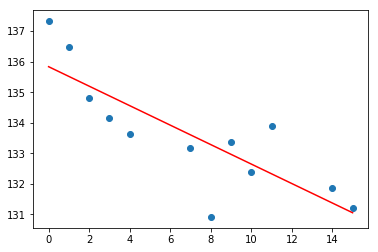

In [119]:
from sklearn.linear_model import LinearRegression

import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

watchlist = []

#Gets the first price from the dataframe 'stock' for the 'ticker' that is not NaN
#May not be the current price (If today's price is NaN, would get yesterday's price)
def get_recentPrice(stock, ticker):
    
    recentPrice = pd.DataFrame(stock.iloc[-1]).T #Initialize it to last trading day
    
    for ind in range(1,stock.shape[0]):
        recentPrice = pd.DataFrame(stock.iloc[-ind]).T
        if(recentPrice['Close'].isnull().values.all()):
            nullDate = recentPrice.index[-1].strftime("%Y-%m-%d")
            print(nullDate + " is null.")
        else:
            break
    print(recentPrice)
    return recentPrice

def screen_watchlist(stock, ticker):
    
    global watchlist
    
    current_price = stock.iloc[-1][3]  #Gets the Close price from last value of df DataFrame to initialize current_price
    mask = (stock['Level Type'] == 'Pivot') | (stock['Level Type'] == 'Relevant') | (stock['Level Type'] == 'Strong') | (stock['Level Type'] == 'Very Strong')
    screen_df = stock[mask]
    print(screen_df)

def get_trendline(stock, ticker):
    
    current_price = get_recentPrice(stock, ticker)
    stock = stock[:current_price.index[-1]]
    
    minimum_df = pd.DataFrame(stock['min'])
    min_mask = ~minimum_df['min'].isna()
    minimum_df = minimum_df[min_mask] #Non NaN dataframe of all minimum values from 'stock'

    maximum_df = pd.DataFrame(stock['max'])
    max_mask = ~maximum_df['max'].isna()
    maximum_df = maximum_df[max_mask] #Non NaN dataframe of all maximum values from 'stock'
    
    if not (minimum_df['min'].empty):
        min_date = minimum_df.index[-1] # Gets minimum_df's last date (most recent date)
    else:
        min_date = datetime.min
    if not (maximum_df['max'].empty):
        max_date = maximum_df.index[-1] # Gets maximum_df's last date (most recent date)
    else:
        max_date = datetime.min

    #Checks if min or max is the last extrema, if the min/max is a greater date than its
    #counter part, set that as last extreme.  Then check if it is equal to the current price date.
    #If it is equal to the current price date, set the last extreme to the opposite (If was min, now max; vice versa)
    if(min_date > max_date):
        last_extreme = min_date
        
        #Checks if the last extrema is the same as the current price (This indicates only one point and therefore no trend)
        if(stock.loc[last_extreme].name == current_price['Close'].index[0]):
            last_extreme = max_date
            
    elif (min_date < max_date):
        last_extreme = max_date
        
        #Checks if the last extrema is the same as the current price (This indicates only one point and therefore no trend)
        if(stock.loc[last_extreme].name == current_price['Close'].index[0]):
            last_extreme = min_date
            
    else:
        return ["No Trend"] #Default if min_date = max_date

    print(minimum_df)
    print(maximum_df)

    #Checks to see if current price is already in the "stock" DataFrame
    if(stock.loc[current_price.index[0]].empty):
        print("In If")
        trend = pd.concat([stock.loc[last_extreme:],current_price])
        print(trend)
    else:
        print("In Else")
        trend = stock.loc[last_extreme:]
        print(type(trend.index.values))

    #X stores the days as integers currently, reshaping the converted list into a single stack column
    X = (trend.index -  trend.index[0]).days.values.reshape(-1, 1) #Difference between first day in list
    #Y stores the closing price values, reshaping the list into a single stack column
    Y = trend['Close'].values.reshape(-1,1)
    print(pd.DataFrame(trend['Close']))
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    print(linear_regressor.fit(X, Y))
    Y_pred = linear_regressor.predict(X)  # make predictions

    print("SCORE: ",linear_regressor.score(X,Y))
    print("COEF_: ",linear_regressor.coef_)

    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    
    dates = pd.DataFrame(trend.index.values, columns = ['Date'])
    dates_list = dates['Date'].dt.strftime('%Y-%m-%d')

    
    x_values = dates_list
    
    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)
    
#     plt.plot(x_values, Y_pred)

    plt.show()

    return ["Trend", linear_regressor.fit(X, Y), X, pd.DataFrame(trend['Close'])]
    
    
    
def get_resistance(stock, ticker):
    
    current_price = get_currentPrice(stock, ticker)
    
    #RESISTANCE: Checks for level type, prioritizing 'Very Strong', and if any are greater than "current_price"
    for level_type in ['Very Strong', 'Strong', 'Relevant', 'Pivot']:
        resistance_mask = ((current_price['Close'][0] < stock[stock['Level Type'] == level_type]['Level']) 
                           & (stock['Level Type'] == level_type))

        if(resistance_mask.any()):
            print("\n",level_type,"\n")

            resistance_lvl = (stock[resistance_mask]['Level'].min(), level_type) #Sets the resistance line (As Tuple) to watch as the level currently closest to current_price

            print(level_type, "Resistance")
            print(resistance_lvl)
            
            return resistance_lvl
        
def get_support(stock, ticker):
    
    current_price = get_currentPrice(stock, ticker)
    
    #SUPPORT: Checks for level type, prioritizing 'Very Strong', and if any are less than "current_price"
    for level_type in ['Very Strong', 'Strong', 'Relevant', 'Pivot']:
        support_mask = ((current_price['Close'][0] > stock[stock['Level Type'] == level_type]['Level']) 
                           & (stock['Level Type'] == level_type))

        if(support_mask.any()):
            print("\n",level_type,"\n")

            support_lvl = (stock[support_mask]['Level'].max(), level_type) #Sets the support line (As Tuple) to watch as the level currently closest to current_price
            print(level_type, "Support")
            print(support_lvl)
            
            return support_lvl

#Trendline works for individual stocks now, supposedly no errors
ticker = 'A'
stock = cumlative[ticker]
get_trendline(stock,ticker)

trend_df = pd.DataFrame()

# for n in np.unique(stock_test.columns.get_level_values(0).tolist()):
    
#     ##CHECKS TO SEE IF STOCK EXISTS
#     if stock_test[n].isnull().values.all():
#         print("Stock {} does not exist.".format(i))
#     else:
#         stock = cumlative[n]
    
#         print(n)
#         trend = get_trendline(stock,n)

#         temp_df = pd.DataFrame(trend).T
#         if trend[0] != 'No Trend':
#             trend_df = pd.concat([trend_df,temp_df])


<built-in method index of list object at 0x1c260d3a08>


In [ ]:
streak = countStreak(np.greater_equal(stock_test['ABR'].Open.values,stock_test['ABR'].Close.values))  
print("ABR : ",  streak)  
stats = countGainLoss(np.greater_equal(stock_test['ABR'].Open.values,stock_test['ABR'].Close.values))  
print('Win Percentage: ', stats.get("Gains")/stats.get("Total"))  
print('Win/Loss: ', stats.get("WinLoss"))  
print("MAX: ",  max(streak))  
plt.hist(streak, density=True, bins=max(streak))  
print("")  
  
np.unique(stock_test.columns.get_level_values(0).tolist())  
  
# print(np.unique(stock_test.columns.get_level_values(0).tolist()))  
# reg = stock_test.loc[:,stock_test.columns.get_level_values(1).isin({'Adj Close'})]  
# high = reg  
# if reg > high:  
#     high = reg  
# else:  
#     high = reg.loc[1:,stock_test.columns.get_level_values(1).isin({'Adj Close'})]  
# high

In [29]:
stock_test = data
stock_test

APLS                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2021-01-11  57.599998  57.599998  55.424999  56.279999  56.279999   547300   
2021-01-12  56.470001  56.470001  53.500000  55.020000  55.020000   781200   
2021-01-13  55.180000  55.500000  51.560001  51.990002  51.990002   756700   
2021-01-14  51.990002  53.740002  51.185001  53.599998  53.599998   758200   
2021-01-15  53.150002  53.980000  51.160000  52.400002  52.400002   714700   
2021-01-19  53.200001  54.290001  52.180000  52.494999  52.494999   833000   
2021-01-20  52.959999  53.349998  49.680000  49.810001  49.810001   467500   
2021-01-21  49.810001  50.259998  47.639999  48.029999  48.029999   702200   
2021-01-22  47.509998  48.000000  45.520000  45.680000  45.680000  1068500   
2021-01-25  46.160000  47.419998  44.310001  46.290001  46.290001   637800   
2021-01-26  46.490002  47.006001  44.509998  44.889999  44.889999   829600   
2021-01-27  44.020000  44.560001  41.889999  42.639999  42.639999   957500   
2021-01-28  43.509998  46.230000  42.811001  44.900002  44.900002   788800   
2021-01-29  45.389999  46.439999  44.200001  44.270000  44.270000   991800   
2021-02-01  44.000000  45.000000  42.549999  44.200001  44.200001   866800   
2021-02-02  45.110001  47.000000  45.110001  46.040001  46.040001   795500   
2021-02-03  45.330002  46.599998  44.700001  45.520000  45.520000   322100   
2021-02-04  46.180000  46.750000  45.200001  46.029999  46.029999   721300   
2021-02-05  46.619999  47.459999  45.680000  46.180000  46.180000   387400   
2021-02-08  46.340000  49.730000  46.180000  49.119999  49.119999   716200   
2021-02-09  48.639999  50.250000  48.270000  49.360001  49.360001   623700   
2021-02-10  49.630001  50.470001  47.200001  47.720001  47.720001   421500   
2021-02-11  48.349998  48.900002  46.700001  47.320000  47.320000   346800   
2021-02-12  47.689999  47.689999  45.700001  46.650002  46.650002   360200   
2021-02-16  46.000000  47.060001  44.439999  44.730000  44.730000   456900   
2021-02-17  44.930000  46.250000  44.000000  45.830002  45.830002   597500   
2021-02-18  45.080002  45.951000  44.330002  44.950001  44.950001   514000   
2021-02-19  45.250000  47.160000  45.250000  45.730000  45.730000   373300   
2021-02-22  45.439999  46.026001  44.509998  45.299999  45.299999   405800   
2021-02-23  44.439999  47.040001  43.049999  45.980000  45.980000   550700   
...               ...        ...        ...        ...        ...      ...   
2021-03-30  43.000000  43.419998  41.799999  42.049999  42.049999   708600   
2021-03-31  42.880001  43.279999  42.259998  42.910000  42.910000   540300   
2021-04-01  43.410000  44.160000  42.630001  43.299999  43.299999   571400   
2021-04-05  44.009998  44.009998  41.970001  42.939999  42.939999   340500   
2021-04-06  43.000000  43.330002  41.160000  41.430000  41.430000   823100   
2021-04-07  41.220001  42.305000  40.689999  40.900002  40.900002   382000   
2021-04-08  41.020000  41.730000  40.849998  41.549999  41.549999   534300   
2021-04-09  41.549999  42.139999  41.290001  41.560001  41.560001   746500   
2021-04-12  41.369999  41.779999  40.530998  41.590000  41.590000   725100   
2021-04-13  41.410000  42.294998  41.389999  42.240002  42.240002   891100   
2021-04-14  42.820000  45.150002  42.639999  44.480000  44.480000   703800   
2021-04-15  44.490002  45.730000  44.240002  44.759998  44.759998   414700   
2021-04-16  47.700001  47.919998  44.615002  45.570000  45.570000   808600   
2021-04-19  45.009998  46.610001  45.009998  45.980000  45.980000   407700   
2021-04-20  45.779999  46.270000  44.938999  45.990002  45.990002   511900   
2021-04-21  45.759998  46.590000  45.290001  46.000000  46.000000   614500   
2021-04-22  46.099998  47.560001  45.250000  46.070000  46.070000  1046400   
2021-04-23  46.130001  46.200001  43.63

In [ ]:
## SIMULATE EXPECTED DISTRIBUTION OF WIN STREAKS (TRUE) GIVEN PROBABILITY  
streak = []  
probability = 0.546  
  
for i in range(10001):  
    x = np.random.random()  
    if x < probability:  
        streak.append(True)  
    else:  
        streak.append(False)  
print(streak)  
t = countStreak(streak)  
print(t)  
print(max(t))  
plt.hist(t, density = True, bins=max(t),align = 'mid')  
plt.ylabel('Probability')  
plt.xlabel('Daily Gain Streak')

In [ ]:
print(stock_test.columns)  
print(cumlative.columns)

In [3]:
import requests  
import xlrd  
from openpyxl import Workbook as WB  
  
def getOnlineFile(url, filename):  
  
    r = requests.get(url, allow_redirects=True)  
    with open(filename, 'wb') as f:  
        f.write(r.content)  
#Need to Fix (doing this to make it easier for getting Top 5 Shiller)  
def flipDataFrame(df):  
      
    index_values = df.columns.values.tolist()  
    col_values = df.index.values.tolist()  
      
    temp_pd = pd.DataFrame(columns = col_values)  
    temp_pd.set_index(index_values, inplace = True)  
    print(temp_pd)  

#Simple "Getter Method"
def getShillerRelative():  
    global shiller_rel_df  
    return shiller_rel_df  
  
#Initializes the ShillerRelative Value  
def setShillerRelative(filename):  
    global shiller_rel_df  
      
    shiller_df = pd.read_excel(filename, engine = 'xlrd')  
      
    ##Cleaning the data by dropping first row and regular PE ratios columns  
    shiller_df.drop(0, inplace = True)  
    shiller_df.rename(columns={'Unnamed: 0': 'Date'}, inplace = True)  
    
    ##Removes even columns it appears, not sure why.  Perhaps because they're empty?
    for i in range(2,24,2):  
        shiller_df.drop('Unnamed: {}'.format(i), axis = 1, inplace = True)  
  
    ##Indexing the data to be greater than this date for daily.  
    mask = shiller_df['Date'] >= '2013-07-12'  
    #print(shiller_df.loc[mask])  
  
    shiller_df = shiller_df.loc[mask]  
    shiller_df.set_index('Date', inplace = True)

    shiller_rel_df = shiller_df[0:1]/shiller_df.mean()  

#Returns the Top 5 Shiller Relative PE values from the sector as a dataframe and prints them to the screen.  
def getTop5():  
    global shiller_rel_df  
      
    column_name = getShillerRelative().index.tolist()[0]  
      
    ##Transpose the Shiller Relative Dataframe so Sectors are the Indices  
    top5_df = shiller_rel_df.transpose()  
    top5_df.rename(columns={column_name:'Shiller Relative PE'},inplace =True)  
    top5_df.columns.name = 'Sector'  
#     print(top5_df)  
    ##Create list form of the Shiller DataFrame to filter values  
    top_5 = []  
      
    _min = top5_df.values.tolist()[0][0]  
    new_shiller = []  
    shiller_list = top5_df.values.tolist()  
      
    #Flatten the list (Not necessary, but okay)  
    for sublist in shiller_list:  
        for value in sublist:  
            new_shiller.append(value)  
      
    #Gets the best 5 relative values  
    for i in range(5):  
          
        for j in new_shiller:  
              
            if j < _min:  
                _min = j  
        top_5.append(_min)  
        new_shiller.remove(_min)  
        _min = 1000000000000000  
      
    ##Filters the DataFrame to only the top 5 best relative values  
    top5_df = top5_df[top5_df['Shiller Relative PE'].isin(top_5)]  
      
    return top5_df  
     
def shillerRelative_toExcel(filename):  
    shillerWB = load_workbook(filename)  
    ws_data = ws.active  
    ws_data.title = 'Sector Data'  
      
      
    shillerWB.create_sheet('Relative Shiller P/E')  
  
shiller_rel_df = pd.DataFrame()  
  
url = 'https://www.gurufocus.com/download_sector_shiller_pe.php'  
filename = '/Users/Nash/Desktop/Trading/sector_shiller_pe.xls'  
  
#print(\"initial:\ \ \  getShillerRelative())  
#getOnlineFile(url, filename)  
setShillerRelative(filename)  
#print(\"after:\ \ \  getShillerRelative(),\"\ \")  
getTop5().index.values.tolist() 

screen_list_df = pd.DataFrame()  
  
#Initial Screening to get stocks that meet requirements for what would have taken hours (now only takes seconds)  
for sector in getTop5().index.values.tolist():
    for exchange in ['NYSE','NASDAQ']:
        screen_list_df = screenSector(sector, exchange, key).append(screen_list_df, ignore_index = True)  
 
screen_list_df

# ## Mapping example if I wanted to create seperate dataframes on Sectors  
# mapping = screen_list_df['sector'] == 'Industrials'  
# sector1 = screen_list_df[mapping]  
# sector1  
  
mapping2 = screen_list_df['price']*screen_list_df['volume'] > 12000000  
new_screen_list_df = screen_list_df[mapping2]  
new_screen_list_df
  

from datetime import date  
from openpyxl import Workbook, load_workbook  
  
path = r'/Users/Nash/Desktop/Trading/Master_Stock_Screen.xlsx'  
  
wb = Workbook()  
ws = wb.active  
  
ws['A1'] = 'This is the Master File for screened Stocks'  
ws['A2'] = 'Program last run: ' + str(date.today())  
  
wb.save(path)  
  
df = pd.DataFrame(screen_list)  
  
book = load_workbook(path)  
writer = pd.ExcelWriter(path, engine = 'openpyxl')  
writer.book = book  
  
if str(date.today()) not in book.sheetnames:  
    df.to_excel(writer, sheet_name = str(date.today()))  
writer.save()  
writer.close()

In [21]:
np.unique(stock_test.columns.get_level_values(0).tolist()).tolist()[4]

'AAXN'